In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objs as go
import geopandas as gpd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [35]:
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [21]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Getting info about the data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [36]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [24]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [25]:
data.shape

(51717, 17)

In [26]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [27]:
data.size

879189

# check the null values

In [28]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Null values in percentage

In [29]:
((data.isnull() | data.isna()).sum()*100 / data.index.size)

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Rename columns

In [41]:
data=data.rename(columns={"approx_cost(for two people)":"cost per 2 ppl","listed_in(type)":"dinning_type"})

# Drop columns

In [37]:
data=data.drop(["url","address", "dish_liked","phone","listed_in(city)"],axis=1)

In [42]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost per 2 ppl,reviews_list,menu_item,dinning_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [43]:
data.shape

(51717, 12)

# Handle null values

In [44]:
data["cost per 2 ppl"]=data["cost per 2 ppl"].apply(lambda x:str(x).replace(",",""))
data["cost per 2 ppl"]=data["cost per 2 ppl"].fillna(data["cost per 2 ppl"].astype(float).mean())

In [45]:
data["cost per 2 ppl"].isnull().sum()

0

In [46]:
def rateclean(value):
    if(value=="NEW" or value=="nan" or value=="-"):
        return np.nan
    return float(str(value).replace("/5",""))

In [47]:
data["rate"]=data["rate"].apply(rateclean)
data["rate"].isnull().sum()

10052

In [48]:
data["rate"]=data["rate"].fillna(data["rate"].mean())
data["rate"].isnull().sum()

0

In [53]:
data=data.dropna(subset=["cuisines", "rest_type"])

In [54]:
data.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
cost per 2 ppl    0
reviews_list      0
menu_item         0
dinning_type      0
dtype: int64

In [55]:
data.shape

(51466, 12)

In [56]:
data.head(4)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost per 2 ppl,reviews_list,menu_item,dinning_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet


# Data Visuallization

# Restaurants with Booking Table

In [57]:
print("Total restaurants having table booking facility:")
(data.book_table == 'Yes').sum()

Total restaurants having table booking facility:


6449

In [58]:
print("Total restaurants having table booking facility:")
(data.book_table == 'No').sum()

Total restaurants having table booking facility:


45017

[Text(0, 0, '6449'), Text(0, 0, '45017')]

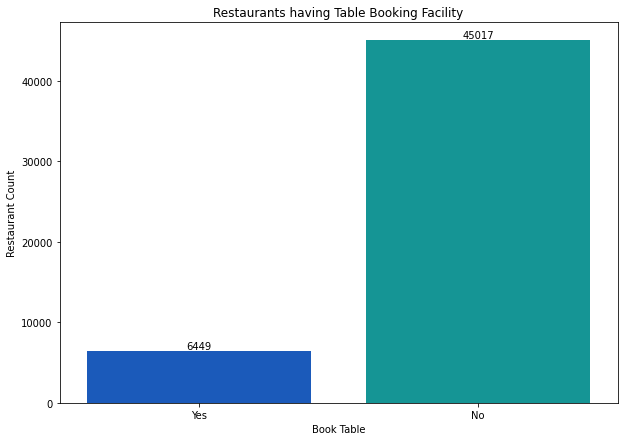

In [63]:
plt.figure(figsize=(10, 7))
a=sns.countplot(data['book_table'], palette='winter')
plt.title("Restaurants having Table Booking Facility")
plt.xlabel("Book Table")
plt.ylabel("Restaurant Count")
a.bar_label(a.containers[0])

Text(0, 0.5, 'Count of booking table')

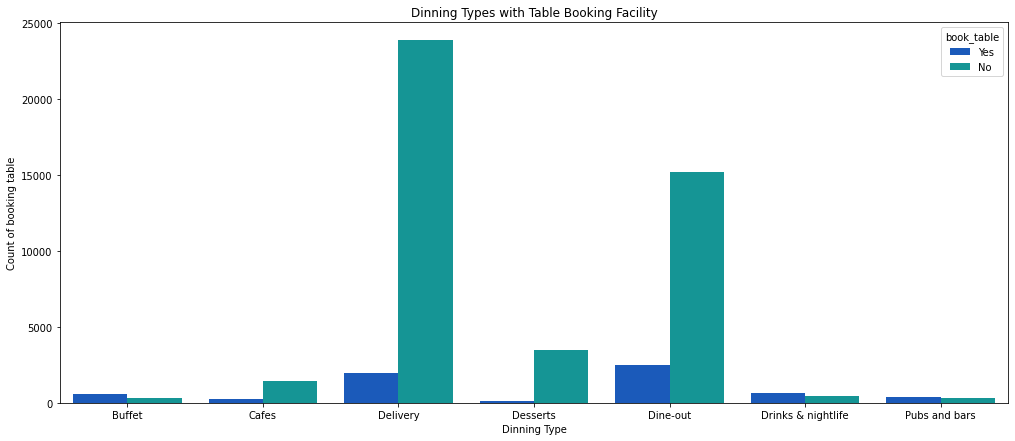

In [64]:
plt.figure(figsize=(17, 7))
a=sns.countplot("dinning_type",data=data,hue="book_table", palette='winter')
plt.title("Dinning Types with Table Booking Facility")
plt.xlabel("Dinning Type")
plt.ylabel("Count of booking table")

# Restaurants with Online Order

In [65]:
print("Total restaurants having online order facility:")
(data.online_order == 'Yes').sum()

Total restaurants having online order facility:


30311

In [66]:
print("Total restaurants having online order facility:")
(data.online_order == 'No').sum()

Total restaurants having online order facility:


21155

[Text(0, 0, '30311'), Text(0, 0, '21155')]

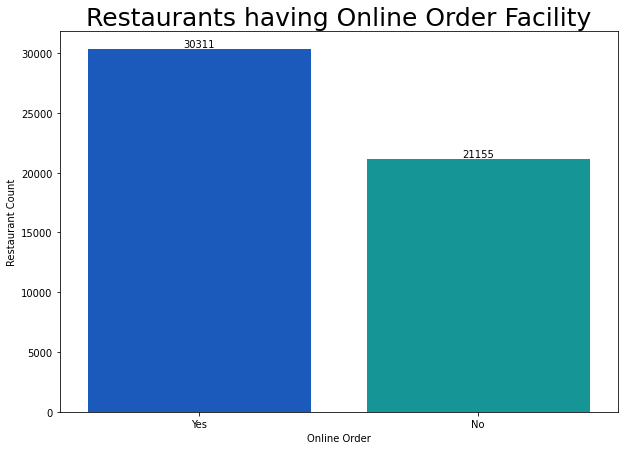

In [91]:
plt.figure(figsize=(10, 7))
a=sns.countplot(data['online_order'], palette='winter')
plt.title("Restaurants having Online Order Facility", fontsize="25")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Count")
a.bar_label(a.containers[0])

Text(0, 0.5, 'Count of book table')

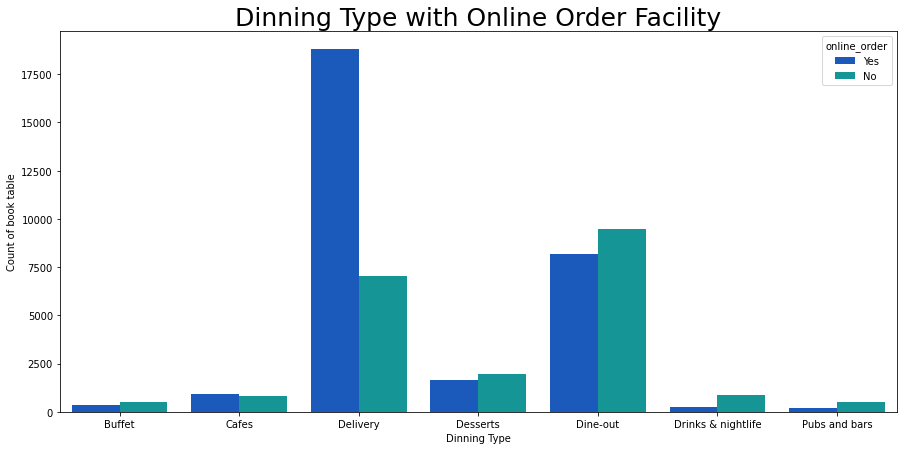

In [90]:
plt.figure(figsize=(15, 7))
a=sns.countplot("dinning_type",data=data,hue="online_order", palette='winter')
plt.title("Dinning Type with Online Order Facility", fontsize="25")
plt.xlabel("Dinning Type")
plt.ylabel("Count of book table")

# Top 25 Locations with Restaurants

In [70]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [71]:
locationrestaurant=(data.groupby('location').count()
              .astype('int')['name']
              .head(25)
              .to_frame())
locationrestaurant

,name
location,
BTM,5097
Banashankari,904
Banaswadi,656
Bannerghatta Road,1624
Basavanagudi,684
Basaveshwara Nagar,191
Bellandur,1271
Bommanahalli,238
Brigade Road,1218


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Banashankari'),
  Text(2, 0, 'Banaswadi'),
  Text(3, 0, 'Bannerghatta Road'),
  Text(4, 0, 'Basavanagudi'),
  Text(5, 0, 'Basaveshwara Nagar'),
  Text(6, 0, 'Bellandur'),
  Text(7, 0, 'Bommanahalli'),
  Text(8, 0, 'Brigade Road'),
  Text(9, 0, 'Brookefield'),
  Text(10, 0, 'CV Raman Nagar'),
  Text(11, 0, 'Central Bangalore'),
  Text(12, 0, 'Church Street'),
  Text(13, 0, 'City Market'),
  Text(14, 0, 'Commercial Street'),
  Text(15, 0, 'Cunningham Road'),
  Text(16, 0, 'Domlur'),
  Text(17, 0, 'East Bangalore'),
  Text(18, 0, 'Ejipura'),
  Text(19, 0, 'Electronic City'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'HBR Layout'),
  Text(22, 0, 'HSR'),
  Text(23, 0, 'Hebbal'),
  Text(24, 0, 'Hennur')])

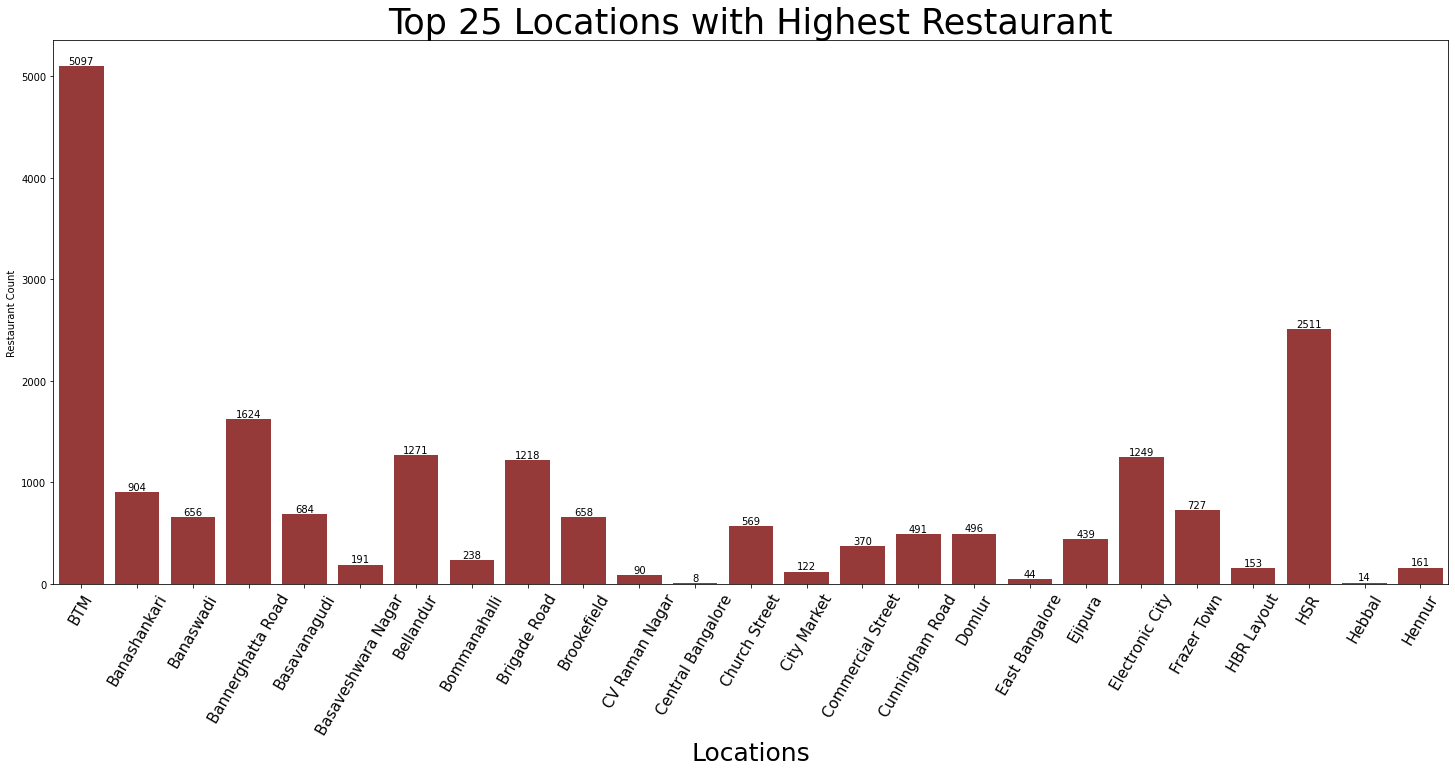

In [88]:
plt.figure(figsize=(25, 10))
a=sns.barplot(
    x=locationrestaurant.index,
    y='name',
    data= locationrestaurant,
    color='brown'
)
plt.title("Top 25 Locations with Highest Restaurant", fontsize="35")
plt.xlabel("Locations", fontsize="25")
plt.ylabel("Restaurant Count")
a.bar_label(a.containers[0])
plt.xticks(fontsize="15",rotation=60)

In [84]:
locrest=(data.groupby('location').count()
              .astype('int')['name']
              .tail(25)
              .to_frame())
locrest

,name
location,
Rajarajeshwari Nagar,2
Rammurthy Nagar,32
Residency Road,675
Richmond Road,812
Sadashiv Nagar,63
Sahakara Nagar,53
Sanjay Nagar,76
Sankey Road,27
Sarjapur Road,1057


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

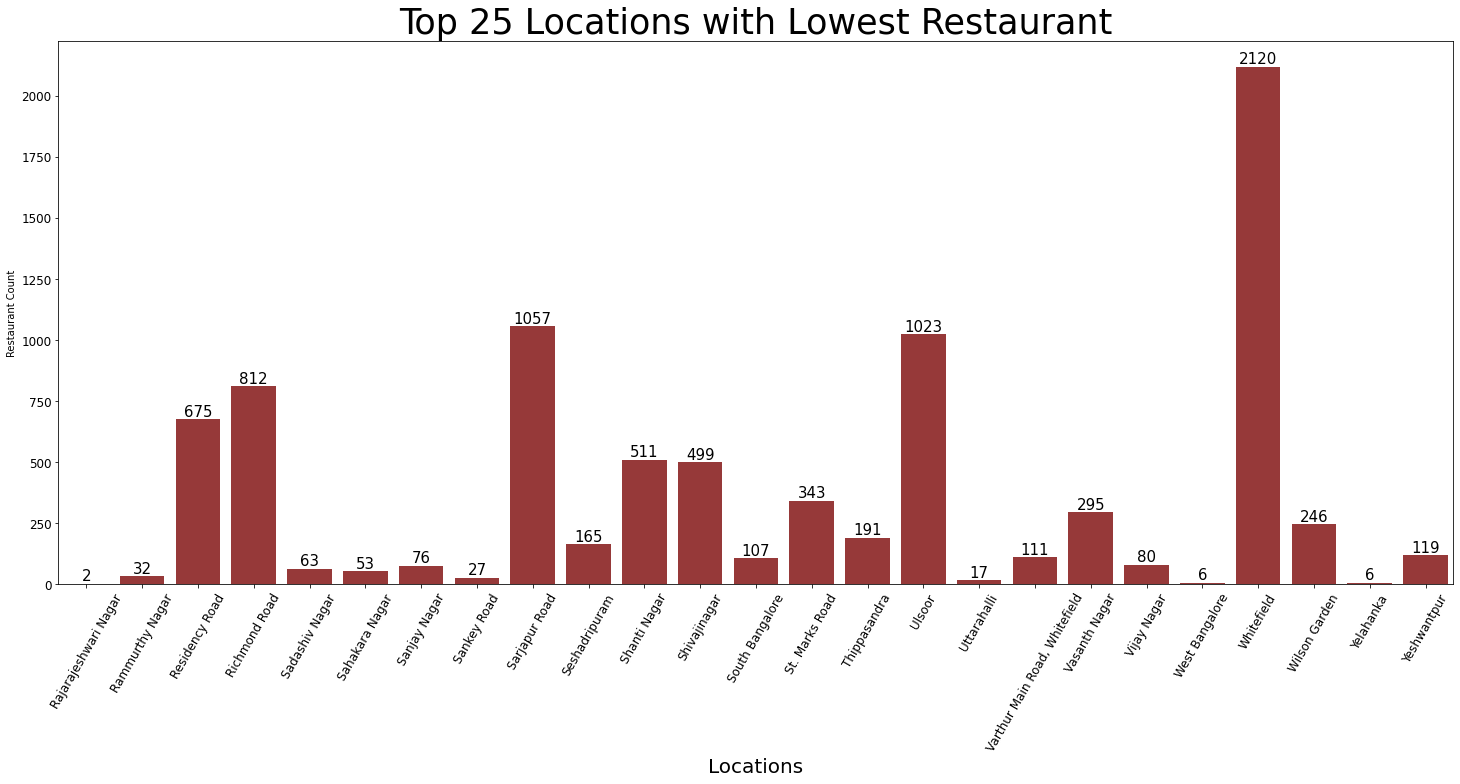

In [89]:
plt.figure(figsize=(25, 10))
a=sns.barplot(
    x=locrest.index,
    y='name',
    data= locrest,
    color='brown'
)
plt.title("Top 25 Locations with Lowest Restaurant",fontsize="35")
plt.xlabel("Locations",fontsize=20)
plt.ylabel("Restaurant Count")
a.bar_label(a.containers[0], fontsize=15)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontname="Georgia", fontsize=12)

# Restaurant's Ratings

In [92]:
data.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [93]:
print("Total no. of ratings between 1.5 to 2.5:")
((data.rate>=1.5) & (data.rate<2.5)).sum()

Total no. of ratings between 1.5 to 2.5:


183

In [94]:
print("Total no. of ratings between 2.5 to 3:")
((data.rate>=2.5) & (data.rate<3)).sum()

Total no. of ratings between 2.5 to 3:


2039

In [95]:
print("Total no. of ratings between 3 to 3.5:")
((data.rate>=3) & (data.rate<3.5)).sum()

Total no. of ratings between 3 to 3.5:


9181

In [96]:
print("Total no. of ratings between 3.5 to 4:")
((data.rate>=3.5) & (data.rate<4)).sum()

Total no. of ratings between 3.5 to 4:


27671

In [97]:
print("Total no. of ratings between 4 to 4.5:")
((data.rate>=4) & (data.rate<4.5)).sum()

Total no. of ratings between 4 to 4.5:


11148

In [98]:
print("Total no. of ratings above 4.5:")
((data.rate>=4.5)).sum()

Total no. of ratings above 4.5:


1244

Text(0.5, 1.0, 'Percentage of Restaurants according to their ratings')

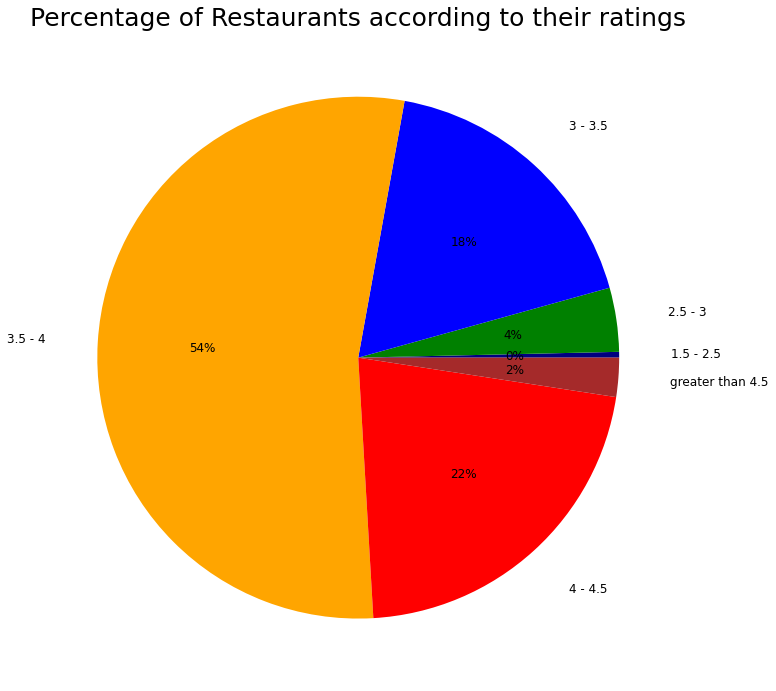

In [102]:
plt.figure(figsize=(15, 12))
labels=['1.5 - 2.5','2.5 - 3', '3 - 3.5','3.5 - 4','4 - 4.5','greater than 4.5']
slices=[((data.rate>=1.5) & (data.rate<2.5)).sum(),
       ((data.rate>=2.5) & (data.rate<3)).sum(),
       ((data.rate>=3) & (data.rate<3.5)).sum(),
       ((data.rate>=3.5) & (data.rate<4)).sum(),
       ((data.rate>=4) & (data.rate<4.5)).sum(),
       ((data.rate>=4.5)).sum()
       ]
textprops = {"fontsize":12}
colors = ['navy', 'green', 'blue', 'orange', 'red', 'brown']
plt.pie(slices,colors=colors, labels=labels, textprops=textprops,  autopct='%1.0f%%',labeldistance=1.2)
plt.title("Percentage of Restaurants according to their ratings",fontsize=25)

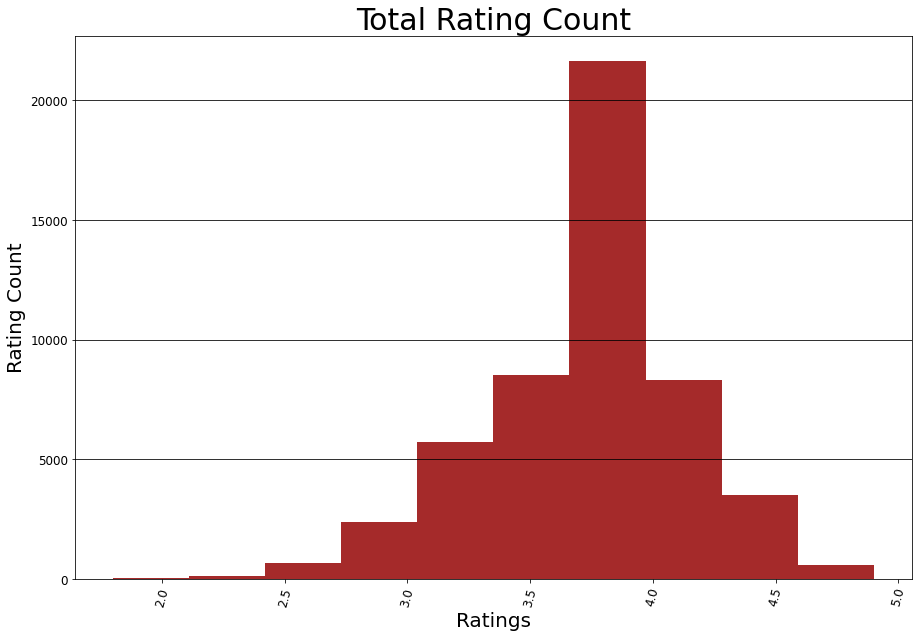

In [104]:
plt.figure(figsize=(15, 10))
a=plt.hist(data["rate"], color='brown')
plt.title("Total Rating Count",fontsize=30)
plt.xlabel("Ratings", fontsize=20)
plt.ylabel("Rating Count", fontsize=20)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.grid(axis='y', color = 'black')

# Restaurants Dinning Type

In [105]:
data["dinning_type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [106]:
rdt=data["dinning_type"].value_counts()

In [107]:
print("Total count of Delivery:")
rdt[0]

Total count of Delivery:


25799

In [108]:
print("Total count of Dine-out:")
rdt[1]

Total count of Dine-out:


17686

In [109]:
print("Total count of Desserts:")
rdt[2]

Total count of Desserts:


3583

In [110]:
print("Total count of Cafes:")
rdt[3]

Total count of Cafes:


1722

In [111]:
print("Total count of Drinks & nightlife:")
rdt[4]

Total count of Drinks & nightlife:


1101

In [112]:
print("Total count of Buffet:")
rdt[5]

Total count of Buffet:


878

In [113]:
print("Total count of Pubs and bars:")
rdt[6]

Total count of Pubs and bars:


697

Text(0.5, 1.0, 'Percentage of Restaurants according to their dinning type')

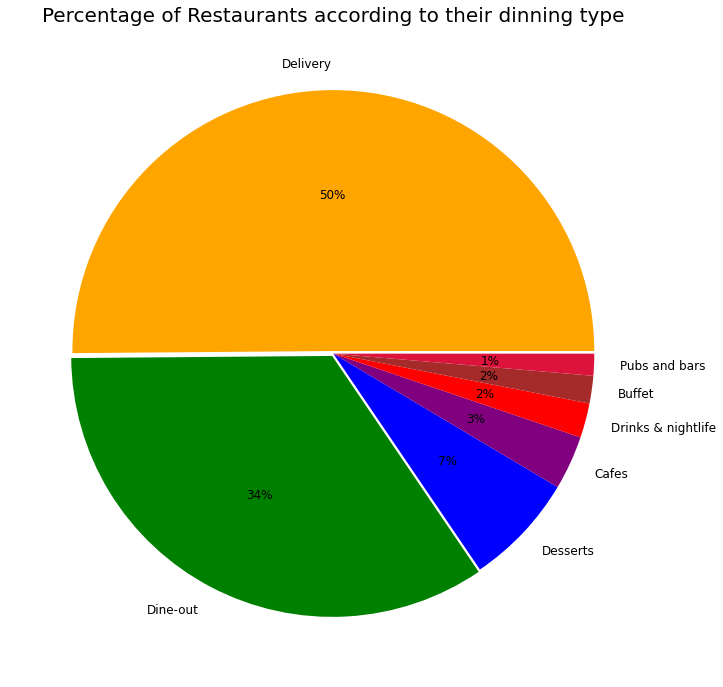

In [114]:
plt.figure(figsize=(15, 12))
labels=['Delivery','Dine-out','Desserts', 'Cafes','Drinks & nightlife','Buffet','Pubs and bars']
slices=[(rdt[0]),
       (rdt[1]),
       (rdt[2]),
       (rdt[3]),
       (rdt[4]),
       (rdt[5]),
       (rdt[6])
       ]
explode = [0.01, 0.01, 0, 0, 0, 0, 0]
textprops = {"fontsize":12}
colors = ['orange', 'green', 'blue', 'purple', 'red', 'brown', 'crimson']
plt.pie(slices,colors=colors, labels=labels, textprops=textprops, explode=explode, autopct='%1.0f%%',labeldistance=1.1)
plt.title("Percentage of Restaurants according to their dinning type", fontsize=20)

# Single VS Multiple Cuisines Restaurants

In [115]:
Singlecuisines = data[data['cuisines'].str.contains(',',na=False)==False]
Singlecuisines.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost per 2 ppl,reviews_list,menu_item,dinning_type
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes


In [116]:
Singlecuisines.shape

(12361, 12)

In [117]:
Multiplecuisines = data[data['cuisines'].str.contains(',',na=False)]
Multiplecuisines.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost per 2 ppl,reviews_list,menu_item,dinning_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [118]:
Multiplecuisines.shape

(39105, 12)

Text(0.5, 1.0, 'Single VS Multiple Cuisines Restaurants')

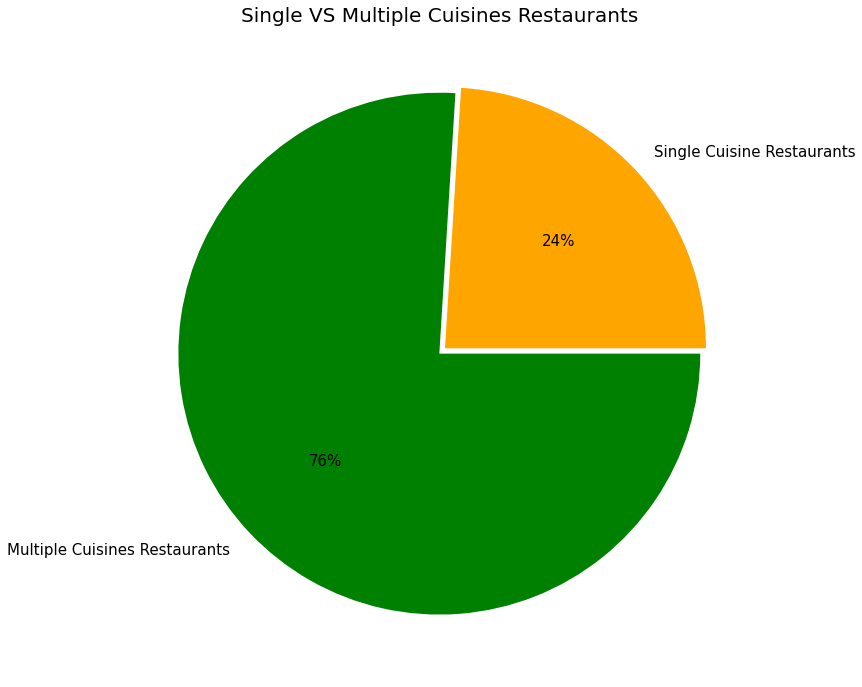

In [119]:
plt.figure(figsize=(15, 12))
labels=['Single Cuisine Restaurants','Multiple Cuisines Restaurants']
slices=[(Singlecuisines.shape[0]),
       (Multiplecuisines.shape[0]),
       ]
explode = [0.03,0]
textprops = {"fontsize":15}
colors = ['orange', 'green']
plt.pie(slices,colors=colors, labels=labels, explode=explode, textprops =textprops, autopct='%1.0f%%',labeldistance=1.1)
plt.title("Single VS Multiple Cuisines Restaurants", fontsize=20)

# Top 20 Restaurant Chain in Bangalore

In [120]:
rcb= data["name"].value_counts(sort=True,)[:20]
rcb

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Chef Baker's         62
Subway               60
Beijing Bites        60
Domino's Pizza       60
KFC                  60
Sweet Truth          60
Smoor                59
McDonald's           59
Faasos               57
Chai Point           56
Name: name, dtype: int64

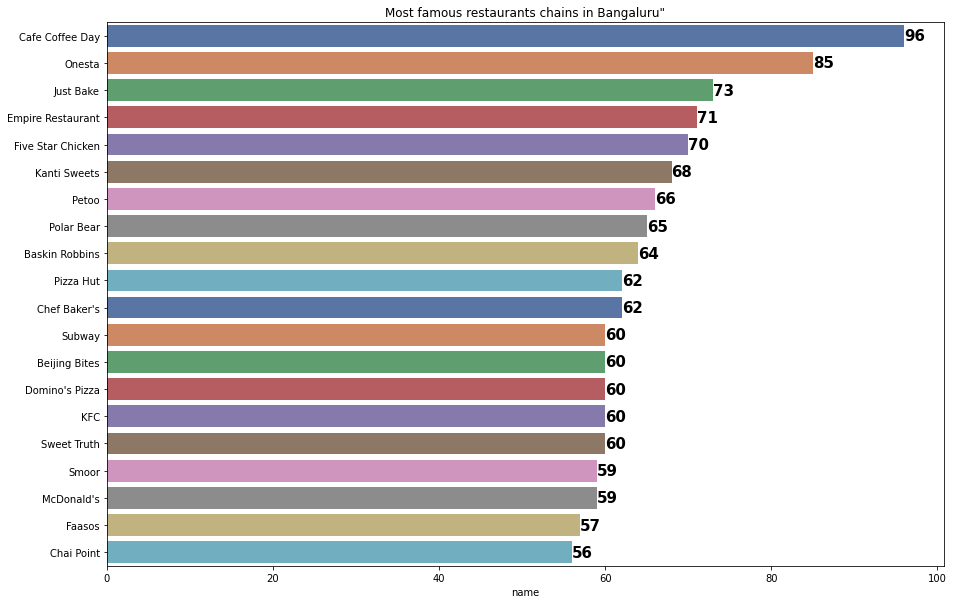

In [121]:
plt.figure(figsize=(15, 10))
a=sns.barplot(x=rcb,y=rcb.index,palette='deep')
plt.title('Most famous restaurants chains in Bangaluru"')
a.bar_label(a.containers[0], weight="bold", fontname="sergio", fontsize=15)
plt.show()

# Top 20 Famous Restaurant Type in Bangalore

In [122]:
rtb= data["rest_type"].value_counts(sort=True,)[:20]
rtb

Quick Bites                   19129
Casual Dining                 10326
Cafe                           3732
Delivery                       2595
Dessert Parlor                 2262
Takeaway, Delivery             2035
Casual Dining, Bar             1154
Bakery                         1141
Beverage Shop                   865
Bar                             697
Food Court                      623
Sweet Shop                      468
Bar, Casual Dining              425
Lounge                          396
Pub                             357
Fine Dining                     346
Casual Dining, Cafe             319
Beverage Shop, Quick Bites      296
Bakery, Quick Bites             289
Mess                            267
Name: rest_type, dtype: int64

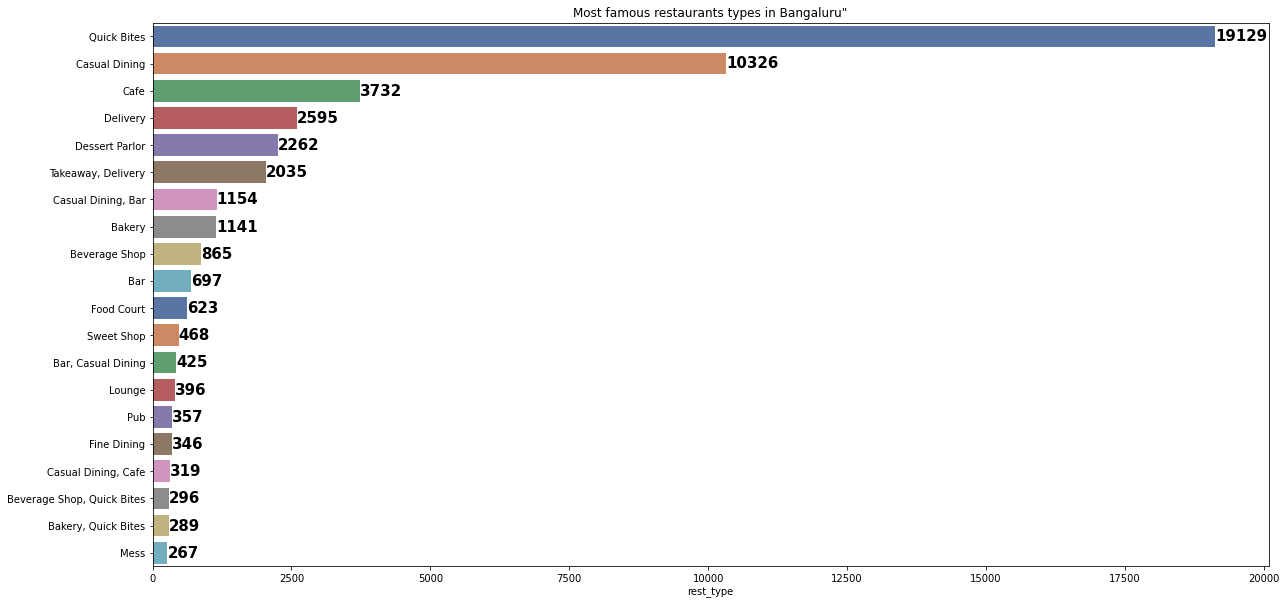

In [123]:
plt.figure(figsize=(20, 10))
a=sns.barplot(x=rtb,y=rtb.index,palette='deep')
plt.title('Most famous restaurants types in Bangaluru"')
a.bar_label(a.containers[0], weight="bold", fontname="sergio", fontsize=15)
plt.show()

# Top 15 Best Location by Votes

In [129]:
locvote=data.groupby('location')['votes'].sum()
locvote=locvote.to_frame()
locvote=locvote.sort_values("votes",ascending=False)
locvote.head(15)

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1194740
Koramangala 4th Block,685156
BTM,614185
Church Street,594979
JP Nagar,586532
Lavelle Road,506186
HSR,499029
Koramangala 7th Block,495324


Text(0.5, 1.0, 'Best Location by Votes)')

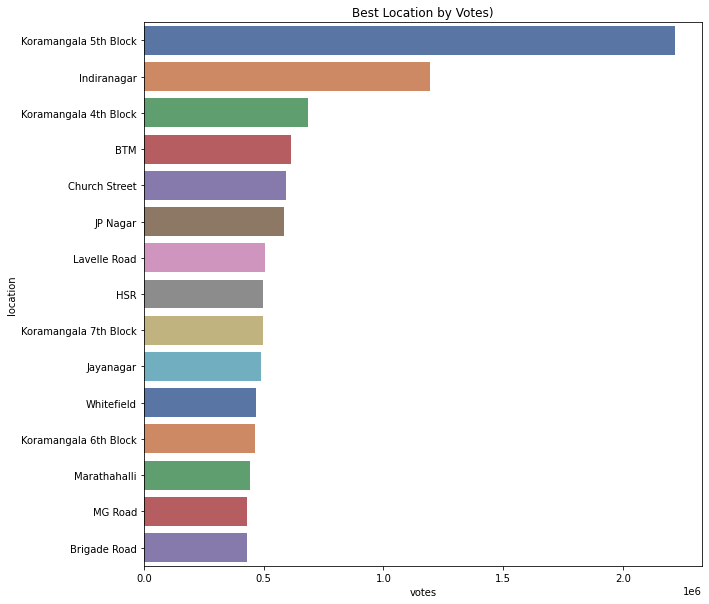

In [131]:
plt.figure(figsize=(10, 10))
a=sns.barplot(y=locvote.index[:15],x=locvote['votes'][:15],palette='deep')
plt.title('Best Location by Votes)')

# Top 15 Best Locations by Rating

In [132]:
locrate=data.groupby('location')['rate'].count()
locrate=locrate.to_frame()
locrate=locrate.sort_values("rate",ascending=False)
locrate.head(15)

,rate
location,
BTM,5097
HSR,2511
Koramangala 5th Block,2504
JP Nagar,2222
Whitefield,2120
Indiranagar,2076
Jayanagar,1924
Marathahalli,1825
Bannerghatta Road,1624


Text(0.5, 1.0, 'Best Location by Rating)')

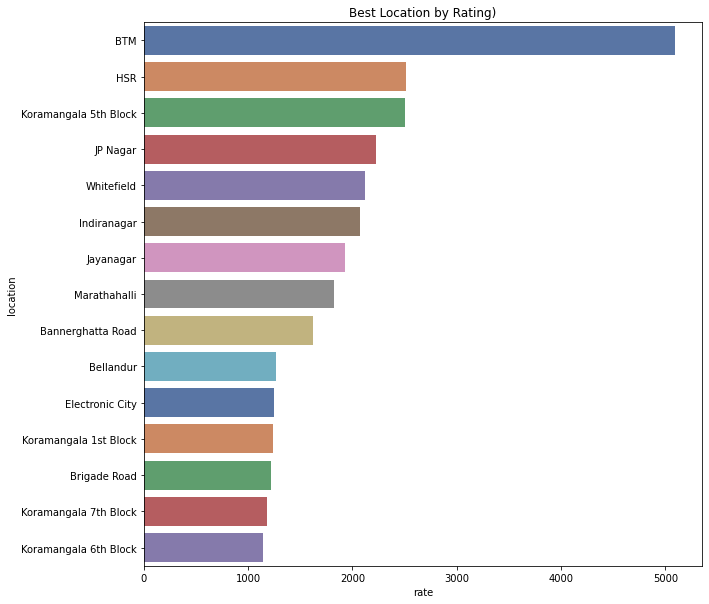

In [133]:
plt.figure(figsize=(10, 10))
a=sns.barplot(y=locrate.index[:15],x=locrate['rate'][:15],palette='deep')
plt.title('Best Location by Rating)')